In [85]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [86]:
df = pd.read_csv('cleaned_data/list_of_popular_movies_cleaned.csv', engine='python')
print(len(df))
df.head()

18996


,id,title,release_date,runtime,revenue,budget,status,original_language,popularity,vote_average,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,299537.0,Captain Marvel,2019-03-06,124.0,910298835.0,152000000.0,Released,en,451.929,7.3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,166428.0,How to Train Your Dragon: The Hidden World,2019-01-03,104.0,375396270.0,129000000.0,Released,en,391.562,7.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,458723.0,Us,2019-03-14,116.0,86950000.0,20000000.0,Released,en,309.012,7.4,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,424783.0,Bumblebee,2018-12-15,114.0,420361283.0,135000000.0,Released,en,226.241,6.5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,504172.0,The Mule,2018-12-14,116.0,64738465.0,50000000.0,Released,en,166.435,6.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [87]:
#create a profitability column
df['profitability'] = df['revenue']/df['budget']

In [88]:
#some revenue and budget placed as 0, remove infinities - want data from year 2009 and greater
non_inf_df = df[(df['profitability'] != float("inf")) & (df['release_year'] >= 2009)]
print(len(non_inf_df))

7641


In [89]:
#some revenues listed as nominal(0), budgets = million, vice versa
#check to see if budget and revenue on same scale

scaled_movies = non_inf_df[((non_inf_df['budget'] > 1000) & (non_inf_df['revenue'] > 1000))|((non_inf_df['budget'] < 1000) & (non_inf_df['revenue'] < 1000))]
scaled_movies

,id,title,release_date,runtime,revenue,budget,status,original_language,popularity,vote_average,...,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,profitability
0,299537.0,Captain Marvel,2019-03-06,124.0,9.102988e+08,152000000.0,Released,en,451.929,7.3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.988808
1,166428.0,How to Train Your Dragon: The Hidden World,2019-01-03,104.0,3.753963e+08,129000000.0,Released,en,391.562,7.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.910049
2,458723.0,Us,2019-03-14,116.0,8.695000e+07,20000000.0,Released,en,309.012,7.4,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.347500
3,424783.0,Bumblebee,2018-12-15,114.0,4.203613e+08,135000000.0,Released,en,226.241,6.5,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.113787
4,504172.0,The Mule,2018-12-14,116.0,6.473846e+07,50000000.0,Released,en,166.435,6.5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.294769
5,297802.0,Aquaman,2018-12-07,144.0,1.143689e+09,160000000.0,Released,en,129.402,6.8,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7.148057
6,299536.0,Avengers: Infinity War,2018-04-25,149.0,2.046240e+09,300000000.0,Released,en,129.988,8.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.820799
7,450001.0,Master Z: Ip Man Legacy,2018-12-20,107.0,0.000000e+00,0.0,Released,cn,148.786,5.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
8,390634.0,Fate/stay night: Heaven’s Feel II. lost butterfly,2019-01-12,120.0,0.000000e+00,0.0,Released,ja,136.705,4.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
9,512196.0,Happy Death Day 2U,2019-02-13,100.0,2.532750e+07,9000000.0,Released,en,116.617,6.1,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,2.814167


In [90]:
print(len(scaled_movies))

6673


In [91]:
movies_high_prof = scaled_movies.sort_values(by='profitability', ascending=False)
print(len(movies_high_prof))

6673


In [92]:
movies_high_prof = movies_high_prof.reset_index().drop(['index'], axis = 1)

In [93]:
print(len(movies_high_prof))
movies_high_prof

6673


,id,title,release_date,runtime,revenue,budget,status,original_language,popularity,vote_average,...,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,profitability
0,23827.0,Paranormal Activity,2009-09-25,86.0,193355800.0,15000.0,Released,en,11.975,5.9,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,12890.386667
1,513434.0,One Cut of the Dead,2017-11-04,96.0,200000000.0,30000.0,Released,ja,3.870,8.4,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6666.666667
2,299245.0,The Gallows,2015-07-10,87.0,42664410.0,100000.0,Released,en,6.891,4.8,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,426.644100
3,76487.0,The Devil Inside,2012-01-06,83.0,101758490.0,1000000.0,Released,en,5.900,4.7,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,101.758490
4,42296.0,Catfish,2010-09-17,87.0,3045943.0,30000.0,Released,en,5.723,6.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101.531433
5,193612.0,The Quiet Ones,2014-04-01,98.0,17834867.0,200000.0,Released,en,7.605,5.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89.174335
6,489999.0,Searching,2018-08-24,103.0,66265218.0,1000000.0,Released,en,18.952,7.6,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,66.265218
7,49018.0,Insidious,2010-09-13,103.0,97009150.0,1500000.0,Released,en,13.311,6.8,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,64.672767
8,277685.0,Unfriended,2015-04-17,82.0,62882090.0,1000000.0,Released,en,7.658,5.4,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,62.882090
9,79120.0,Weekend,2011-09-22,96.0,484592.0,8000.0,Released,en,6.639,7.5,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,60.574000


In [94]:
movies_high_prof.loc[movies_high_prof['title'] == "Justice League"]

,id,title,release_date,runtime,revenue,budget,status,original_language,popularity,vote_average,...,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,profitability
1282,141052.0,Justice League,2017-11-15,120.0,657924295.0,500000000.0,Released,en,35.593,6.2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.315849


create database and/or connect to db

In [95]:
import sqlite3
conn = sqlite3.connect('proj1movies.db')
cur = conn.cursor()
#movies_high_prof.to_sql('movies_high_prof', conn, if_exists='replace')

In [96]:
cur.execute("""SELECT * FROM movies_high_prof""").fetchall()

[(0,
  23827.0,
  'Paranormal Activity',
  '2009-09-25',
  86.0,
  193355800.0,
  15000.0,
  'Released',
  'en',
  11.975,
  5.9,
  2614.0,
  'tt1179904',
  2009.0,
  "['Horror', 'Mystery']",
  "['Blumhouse Productions', 'Solana Films']",
  "['United States of America']",
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  12890.386666666667),
 (1,
  513434.0,
  'One Cut of the Dead',
  '2017-11-04',
  96.0,
  200000000.0,
  30000.0,
  'Released',
  'ja',
  3.87,
  8.4,
  47.0,
  'tt7914416',
  2017.0,
  "['Comedy', 'Horror', 'Drama']",
  "['Panpokopina', 'ENBU Seminar']",
  "['Japan']",
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  6666.666666666667),
 (2,
  299245.0,
  'The Gallows',
  '2015-07-10',
  87.0,
  42664410.0,
  100000.0,
  'Released',
  'en',
  6.891,
  4.8,
  565.0,
  'tt2309260',
  2015.0,
  "['Horror

In [97]:
movies_high_prof.columns

Index(['id', 'title', 'release_date', 'runtime', 'revenue', 'budget', 'status',
       'original_language', 'popularity', 'vote_average', 'vote_count',
       'imdb_id', 'release_year', 'genres_list', 'production_company_list',
       'production_country_list', 'Action', 'Adventure', 'Animation', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
       'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie',
       'Thriller', 'War', 'Western', 'profitability'],
      dtype='object')

get a list of the genres

In [98]:
all_genres = ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 
              'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 
              'Thriller', 'War', 'Western']

create a new column for movie number of genres

In [99]:
movies_high_prof[movies_high_prof['budget'] == 0]

,id,title,release_date,runtime,revenue,budget,status,original_language,popularity,vote_average,...,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,profitability
2061,450001.0,Master Z: Ip Man Legacy,2018-12-20,107.0,0.0,0.0,Released,cn,148.786,5.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2062,390634.0,Fate/stay night: Heaven’s Feel II. lost butterfly,2019-01-12,120.0,0.0,0.0,Released,ja,136.705,4.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2063,399361.0,Triple Frontier,2019-03-06,126.0,0.0,0.0,Released,en,114.644,6.2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN
2064,329996.0,Dumbo,2019-03-27,130.0,0.0,0.0,Released,en,82.349,6.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2065,429471.0,Captive State,2019-03-15,110.0,0.0,0.0,Released,en,64.270,4.3,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,NaN
2066,449985.0,Triple Threat,2019-02-28,96.0,0.0,0.0,Released,en,44.843,6.4,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN
2067,586347.0,The Hard Way,2019-03-20,94.0,0.0,0.0,Released,en,65.082,5.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2068,327331.0,The Dirt,2019-03-22,107.0,0.0,0.0,Released,en,69.684,7.2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2069,449563.0,Isn't It Romantic,2019-02-13,89.0,0.0,0.0,Released,en,49.517,6.4,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN
2070,52371.0,LelleBelle,2010-10-09,89.0,0.0,0.0,Released,nl,39.283,4.6,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN


get rid of rows with 0 revenue

In [100]:
movies_high_prof.drop(list(range(2061, 6673)), inplace=True)

In [101]:
print(len(movies_high_prof))
movies_high_prof

2061


,id,title,release_date,runtime,revenue,budget,status,original_language,popularity,vote_average,...,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,profitability
0,23827.0,Paranormal Activity,2009-09-25,86.0,193355800.0,15000.0,Released,en,11.975,5.9,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,12890.386667
1,513434.0,One Cut of the Dead,2017-11-04,96.0,200000000.0,30000.0,Released,ja,3.870,8.4,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6666.666667
2,299245.0,The Gallows,2015-07-10,87.0,42664410.0,100000.0,Released,en,6.891,4.8,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,426.644100
3,76487.0,The Devil Inside,2012-01-06,83.0,101758490.0,1000000.0,Released,en,5.900,4.7,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,101.758490
4,42296.0,Catfish,2010-09-17,87.0,3045943.0,30000.0,Released,en,5.723,6.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101.531433
5,193612.0,The Quiet Ones,2014-04-01,98.0,17834867.0,200000.0,Released,en,7.605,5.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89.174335
6,489999.0,Searching,2018-08-24,103.0,66265218.0,1000000.0,Released,en,18.952,7.6,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,66.265218
7,49018.0,Insidious,2010-09-13,103.0,97009150.0,1500000.0,Released,en,13.311,6.8,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,64.672767
8,277685.0,Unfriended,2015-04-17,82.0,62882090.0,1000000.0,Released,en,7.658,5.4,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,62.882090
9,79120.0,Weekend,2011-09-22,96.0,484592.0,8000.0,Released,en,6.639,7.5,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,60.574000


In [102]:
movies_high_prof.loc[movies_high_prof['Horror'] == 1.0]

,id,title,release_date,runtime,revenue,budget,status,original_language,popularity,vote_average,...,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,profitability
0,23827.0,Paranormal Activity,2009-09-25,86.0,193355800.0,15000.0,Released,en,11.975,5.9,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,12890.386667
1,513434.0,One Cut of the Dead,2017-11-04,96.0,200000000.0,30000.0,Released,ja,3.870,8.4,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6666.666667
2,299245.0,The Gallows,2015-07-10,87.0,42664410.0,100000.0,Released,en,6.891,4.8,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,426.644100
3,76487.0,The Devil Inside,2012-01-06,83.0,101758490.0,1000000.0,Released,en,5.900,4.7,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,101.758490
5,193612.0,The Quiet Ones,2014-04-01,98.0,17834867.0,200000.0,Released,en,7.605,5.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89.174335
7,49018.0,Insidious,2010-09-13,103.0,97009150.0,1500000.0,Released,en,13.311,6.8,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,64.672767
8,277685.0,Unfriended,2015-04-17,82.0,62882090.0,1000000.0,Released,en,7.658,5.4,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,62.882090
10,41436.0,Paranormal Activity 2,2010-10-20,91.0,177512032.0,3000000.0,Released,en,8.806,5.7,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,59.170677
11,419430.0,Get Out,2017-02-24,104.0,255017329.0,4500000.0,Released,en,36.533,7.5,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,56.670518
13,72571.0,Paranormal Activity 3,2011-10-19,83.0,205703818.0,5000000.0,Released,en,6.438,5.9,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.140764


In [103]:
movies_high_prof.loc[movies_high_prof['Thriller'] == 1.0]

,id,title,release_date,runtime,revenue,budget,status,original_language,popularity,vote_average,...,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,profitability
2,299245.0,The Gallows,2015-07-10,87.0,42664410.0,100000.0,Released,en,6.891,4.8,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,426.644100
3,76487.0,The Devil Inside,2012-01-06,83.0,101758490.0,1000000.0,Released,en,5.900,4.7,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,101.758490
6,489999.0,Searching,2018-08-24,103.0,66265218.0,1000000.0,Released,en,18.952,7.6,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,66.265218
7,49018.0,Insidious,2010-09-13,103.0,97009150.0,1500000.0,Released,en,13.311,6.8,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,64.672767
8,277685.0,Unfriended,2015-04-17,82.0,62882090.0,1000000.0,Released,en,7.658,5.4,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,62.882090
10,41436.0,Paranormal Activity 2,2010-10-20,91.0,177512032.0,3000000.0,Released,en,8.806,5.7,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,59.170677
11,419430.0,Get Out,2017-02-24,104.0,255017329.0,4500000.0,Released,en,36.533,7.5,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,56.670518
15,38358.0,The Last Exorcism,2010-08-27,87.0,67738090.0,1800000.0,Released,en,6.901,5.5,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,37.632272
18,21407.0,The Collector,2009-07-09,88.0,114000000.0,3400000.0,Released,en,8.121,6.3,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,33.529412
20,381288.0,Split,2017-01-19,117.0,278454358.0,9000000.0,Released,en,20.145,7.2,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,30.939373


In [104]:
movies_high_prof.sort_values(by='budget', ascending=False)

,id,title,release_date,runtime,revenue,budget,status,original_language,popularity,vote_average,...,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,profitability
1282,141052.0,Justice League,2017-11-15,120.0,6.579243e+08,500000000.0,Released,en,35.593,6.2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.315849
762,1865.0,Pirates of the Caribbean: On Stranger Tides,2011-05-14,136.0,1.045714e+09,380000000.0,Released,en,30.582,6.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.751878
240,299536.0,Avengers: Infinity War,2018-04-25,149.0,2.046240e+09,300000000.0,Released,en,129.988,8.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.820799
369,99861.0,Avengers: Age of Ultron,2015-04-22,141.0,1.405404e+09,280000000.0,Released,en,55.839,7.3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.019299
931,38757.0,Tangled,2010-02-03,100.0,5.917949e+08,260000000.0,Released,en,18.752,7.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.276134
1721,57201.0,The Lone Ranger,2013-07-03,149.0,8.928991e+07,255000000.0,Released,en,10.736,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.350157
454,49026.0,The Dark Knight Rises,2012-07-16,165.0,1.084939e+09,250000000.0,Released,en,26.866,7.7,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.339756
547,767.0,Harry Potter and the Half-Blood Prince,2009-07-07,153.0,9.339592e+08,250000000.0,Released,en,25.449,7.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.735837
701,127585.0,X-Men: Days of Future Past,2014-05-15,131.0,7.478628e+08,250000000.0,Released,en,31.875,7.5,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.991451
1362,49529.0,John Carter,2012-03-07,132.0,2.841391e+08,250000000.0,Released,en,13.440,6.1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.136556


Does a high budget equate to higher profitability?

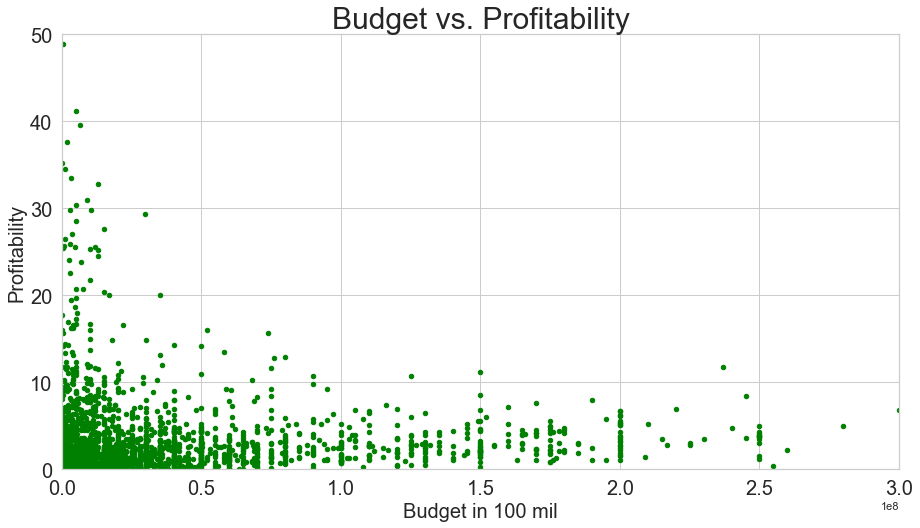

In [105]:
sns.set(style="whitegrid")
# fig, ax = plt.subplots(figsize=(15,8))
# sns.set_style('darkgrid')
# sns.relplot(ax=ax, x='budget', y='profitability', data=movies_high_prof, hue='original_language', palette="deep")
# ax.set_ylim(0,50) 
# ax.set_xlim(-100, 300000000)
# ax.set_title("Budget vs Profitability")

movies_high_prof.plot(kind='scatter', x='budget', y = 'profitability', figsize=(15,8), color='green')
plt.title('Budget vs. Profitability', fontsize=30)
plt.ylabel("Profitability", fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Budget in 100 mil", fontsize=20)
plt.xticks(fontsize=20)
plt.ylim(0,50)
plt.xlim(-100,300000000)
plt.show()

Justice League had a budget of $500 mil and had a profitability of 1.31.
I excluded outliers for profitability that exceded 50 and budget that exceeded 300 mil (which was Justice League and Pirates of the Caribbean: On Stranger Tides with budgets of 500 and 380 mill respectively)

(plot does not include extreme outlier like which were the top three: Paranormal Activity, Once Cut of the Dead, and The Gallows)  
From the Graph we can see that the profitability exponentially decreases as the budget goes up.

For the movies that actually made a profit which genres were included the most? for the movies that failed, which genres were included the most?

In [106]:
len(all_genres)

18

If a film only makes 10 mil at the box office, the distributor will only get 45 percent of the money. But if a film makes 300 mil at the box office , then the distributor gets up to 60 percent of that money. A good estimate for a profitable movie that will make money in the end is 50% is what the studio makes. This equates to a profitability of 2.

get a dictionary with key=genre and value=count for movies that made a profit

In [107]:
movies_made_prof = movies_high_prof[movies_high_prof['profitability'] >= 2]
all_genre_prof_cnt = []
for genre in all_genres:
    #get the movie count for each genre - specify the genre
    all_genre_prof_cnt.append(sum(movies_made_prof[genre]))

print(all_genre_prof_cnt)


[302.0, 217.0, 94.0, 389.0, 111.0, 12.0, 427.0, 137.0, 128.0, 36.0, 128.0, 33.0, 84.0, 159.0, 137.0, 246.0, 24.0, 8.0]


do the same thing but now for movies that failed

In [108]:
movies_not_made_prof = movies_high_prof[movies_high_prof['profitability'] < 2]
all_genre_not_prof_cnt = []
for genre in all_genres:
    #get the movie count for each genre - specify the genre
    all_genre_not_prof_cnt.append(sum(list(movies_not_made_prof[genre].values)))
    
print(all_genre_not_prof_cnt)

[268.0, 164.0, 55.0, 308.0, 177.0, 5.0, 579.0, 75.0, 96.0, 61.0, 98.0, 29.0, 107.0, 157.0, 111.0, 319.0, 42.0, 11.0]


In [109]:
print(len(movies_not_made_prof))

1036


create a bar graph comparing the movies that failed and succeeded

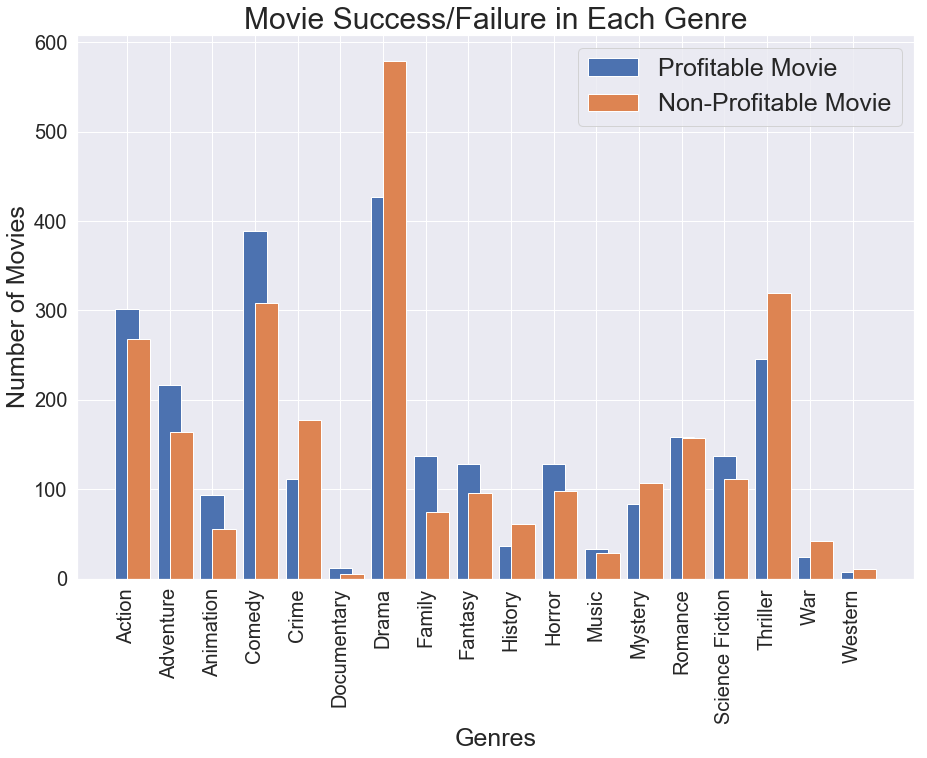

In [110]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,10))
plt.bar(all_genres, all_genre_prof_cnt, label='Profitable Movie', align='center', width=0.55)
plt.bar(all_genres, all_genre_not_prof_cnt, label='Non-Profitable Movie', align='edge', width=0.55)
plt.legend(loc=1, prop={'size': 25})
plt.xticks(rotation='vertical', fontsize=20)
plt.xlabel('Genres', fontsize=25)
plt.ylabel('Number of Movies', fontsize=25)
plt.yticks(fontsize=20)
plt.title('Movie Success/Failure in Each Genre', fontsize=30)
plt.show()

Want to look at the percentage of successful movies then failure movies

In [48]:
#turn list to np
np_success = np.asarray(all_genre_prof_cnt, dtype=np.float32)
np_failure = np.asarray(all_genre_not_prof_cnt, dtype=np.float32)

In [49]:
#get total
np_total_movies = np_success + np_failure
np_total_movies

array([ 570.,  381.,  149.,  697.,  288.,   17., 1006.,  212.,  224.,
         97.,  226.,   62.,  191.,  316.,  248.,  565.,   66.,   19.],
      dtype=float32)

In [50]:
#get the percentage of success and failure movies
perc_succ = np_success/np_total_movies
perc_fail = np_failure/np_total_movies

In [51]:
print(perc_succ)
print(perc_fail)

[0.52982455 0.5695538  0.6308725  0.5581062  0.38541666 0.7058824
 0.4244533  0.6462264  0.5714286  0.371134   0.5663717  0.5322581
 0.43979058 0.5031645  0.55241936 0.43539822 0.36363637 0.42105263]
[0.47017545 0.4304462  0.3691275  0.44189382 0.6145833  0.29411766
 0.57554674 0.3537736  0.42857143 0.62886596 0.43362832 0.46774194
 0.56020945 0.49683544 0.44758064 0.5646018  0.6363636  0.57894737]


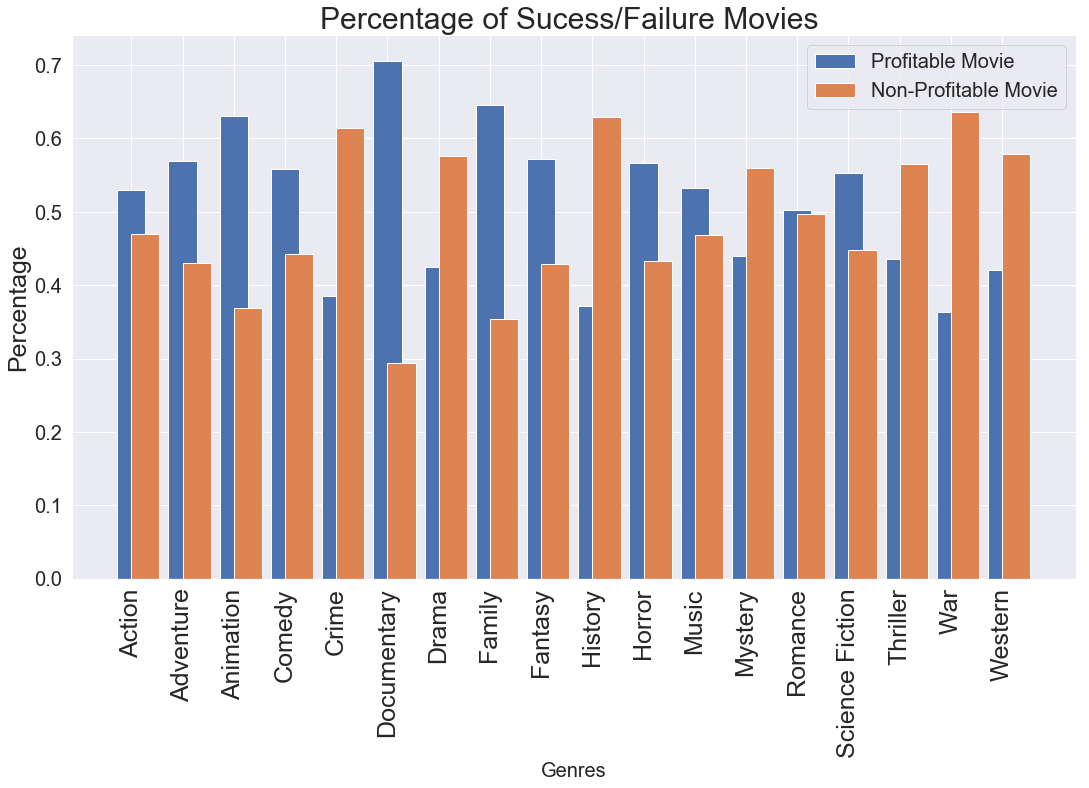

In [111]:
#plot successful movie
plt.figure(figsize=(18,10))

plt.bar(all_genres, perc_succ, label='Profitable Movie', align='center', width=0.55)
plt.bar(all_genres, perc_fail, label='Non-Profitable Movie', align='edge', width=0.55)


plt.legend(loc=1, prop={'size': 20})
plt.title('Percentage of Sucess/Failure Movies ', fontsize=30)
plt.xticks(rotation='vertical', fontsize=25)
plt.xlabel("Genres", fontsize=20)
plt.ylabel("Percentage", fontsize=25)
plt.yticks(fontsize=20)
plt.show()

Highest successful ratio of movie genres was a suprise because the genre with the best chances to turn a profit was the genre with the least amount of movie releases.

Highest failure ratio of movie, where its more likely to fail than succeed, are the genres of Drama, History, Thriller, War, and Western. This was also surprising because many of the top movies with the highest profitabilities are "Paranormal Activity", "The Gallows", "Insidious", "Get Out" and even that wasn't enough to sway the percentages towards the profitable side.

In [61]:
df_actors = pd.read_csv('cleaned_data/actors.csv', engine='python')
df_actors

,title,actor,year
0,Captain Marvel,Brie Larson,2019
1,Captain Marvel,Samuel L. Jackson,2019
2,Captain Marvel,Ben Mendelsohn,2019
3,Captain Marvel,Djimon Hounsou,2019
4,Captain Marvel,Lee Pace,2019
5,Captain Marvel,Lashana Lynch,2019
6,Captain Marvel,Gemma Chan,2019
7,Captain Marvel,Annette Bening,2019
8,Captain Marvel,Clark Gregg,2019
9,How to Train Your Dragon: The Hidden World,Jay Baruchel,2019


In [63]:
df_movies_info = pd.read_csv('cleaned_data/movie_info.csv', engine='python')
df_movies_info

,rank_in_year,title,year,genre,gross
0,1,Captain Marvel,2019,Action,323646033
1,2,How to Train Your Dragon: The Hidden World,2019,Adventure,147460290
2,3,Glass,2019,Thriller/Suspense,110861630
3,4,The Upside,2019,Comedy,106984792
4,5,The LEGO Movie 2: The Second Part,2019,Adventure,103762494
5,6,Us,2019,Thriller/Suspense,85106185
6,7,Alita: Battle Angel,2019,Action,83956461
7,8,Aquaman,2019,Action,74802530
8,9,Tyler Perry's A Madea Family Funeral,2019,Comedy,66688573
9,10,Spider-Man: Into The Spider-Verse 3D,2019,Adventure,55923345


seperate the movies_info dataframe with only the info we need - title, genre, rank

In [64]:
title_genre = df_movies_info[['title', 'genre', 'rank_in_year']]
title_genre

,title,genre,rank_in_year
0,Captain Marvel,Action,1
1,How to Train Your Dragon: The Hidden World,Adventure,2
2,Glass,Thriller/Suspense,3
3,The Upside,Comedy,4
4,The LEGO Movie 2: The Second Part,Adventure,5
5,Us,Thriller/Suspense,6
6,Alita: Battle Angel,Action,7
7,Aquaman,Action,8
8,Tyler Perry's A Madea Family Funeral,Comedy,9
9,Spider-Man: Into The Spider-Verse 3D,Adventure,10


combine both dataframes

In [65]:
df_all_movie = df_actors.merge(title_genre, on="title")
df_all_movie

,title,actor,year,genre,rank_in_year
0,Captain Marvel,Brie Larson,2019,Action,1
1,Captain Marvel,Samuel L. Jackson,2019,Action,1
2,Captain Marvel,Ben Mendelsohn,2019,Action,1
3,Captain Marvel,Djimon Hounsou,2019,Action,1
4,Captain Marvel,Lee Pace,2019,Action,1
5,Captain Marvel,Lashana Lynch,2019,Action,1
6,Captain Marvel,Gemma Chan,2019,Action,1
7,Captain Marvel,Annette Bening,2019,Action,1
8,Captain Marvel,Clark Gregg,2019,Action,1
9,How to Train Your Dragon: The Hidden World,Jay Baruchel,2019,Adventure,2


look at the number of movies per year for each genre - reset index is to undo the groupby function of turnign genre, year to index, make column

In [66]:
gen_yr_name = df_all_movie.groupby(['genre', 'year']).agg({'title': 'count'}).reset_index([0,1])
gen_yr_name

,genre,year,title
0,Action,2015,116
1,Action,2016,147
2,Action,2017,129
3,Action,2018,185
4,Action,2019,59
5,Adventure,2015,164
6,Adventure,2016,204
7,Adventure,2017,178
8,Adventure,2018,197
9,Adventure,2019,65


get a list of all the genres

In [67]:
all_genres = list(gen_yr_name['genre'].unique())
all_genres

['Action',
 'Adventure',
 'Aug 20, 1999',
 'Black Comedy',
 'China Lion Film D…',
 'Comedy',
 'Concert/Performance',
 'Continental Distr…',
 'Documentary',
 'Drama',
 'GKIDS',
 'Horror',
 'Multiple Genres',
 'Musical',
 'Oscilloscope Pict…',
 'Reality',
 'Romantic Comedy',
 'Thriller/Suspense',
 'Western']

create a dictionary for each genre - store the movie counts as values

In [68]:
all_movie_yr_cnt = {}
for genre in all_genres:
    #get the movie count for each year - specify the genre
    genre_cnt = list(gen_yr_name[gen_yr_name['genre'] == genre]['title'].values)
    #check if data spans all 5 years
    if len(genre_cnt) == 5:
        all_movie_yr_cnt[genre] = genre_cnt
    

In [69]:
all_movie_yr_cnt

{'Action': [116, 147, 129, 185, 59],
 'Adventure': [164, 204, 178, 197, 65],
 'Black Comedy': [33, 20, 27, 22, 6],
 'Comedy': [221, 248, 162, 149, 50],
 'Documentary': [13, 9, 30, 35, 26],
 'Drama': [453, 412, 404, 346, 162],
 'Horror': [24, 50, 43, 48, 9],
 'Multiple Genres': [1, 1, 27, 23, 10],
 'Musical': [20, 18, 26, 37, 5],
 'Romantic Comedy': [33, 55, 31, 28, 16],
 'Thriller/Suspense': [110, 109, 101, 130, 64],
 'Western': [14, 24, 10, 10, 6]}

plot the line graph - the number of movies by year that have the genre

Do people have a preference in the genre of movie that they watch (Top 500 Grossing)? for each year?

In [70]:
year = [2015, 2016, 2017, 2018, 2019]

No handles with labels found to put in legend.


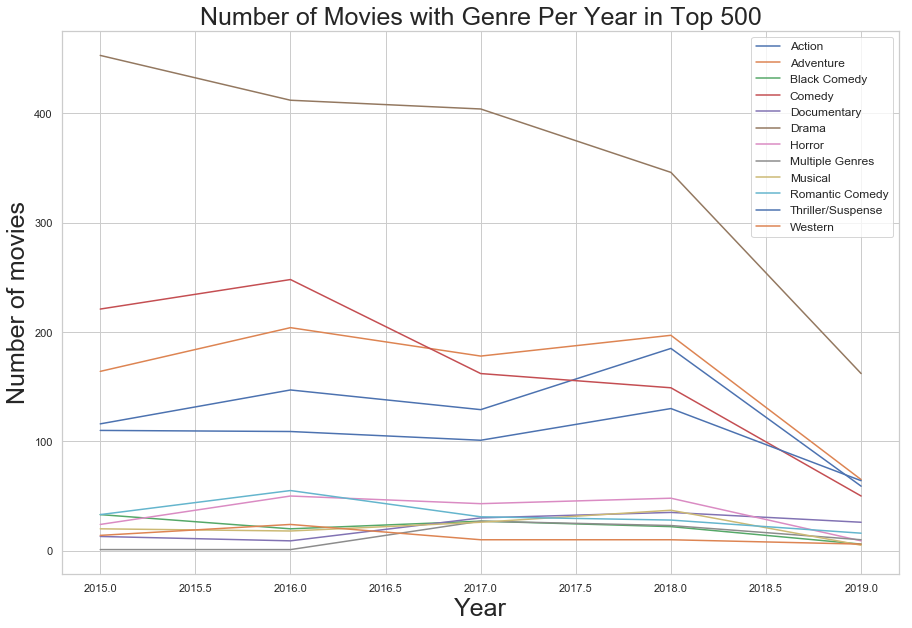

In [83]:
fig, ax = plt.subplots(figsize=(15,10))
sns.set_style('whitegrid')
ax.legend(loc="upper right")
for movie_name, movie_cnt in all_movie_yr_cnt.items():

    ax.plot(year, movie_cnt, label=movie_name) 

ax.set_title("Number of Movies with Genre Per Year in Top 500", fontsize=25)
ax.set_xlabel("Year", fontsize=25)
ax.set_ylabel("Number of movies", fontsize=25)
ax.legend(loc=1, fontsize=12)

plt.show()